# MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import cv2
# from google.colab.patches import cv2_imshow
# from PIL import Image
import tensorflow as tf
# tf.random.set_seed(3)
# from tensorflow import keras
# from keras.datasets import mnist
# from tensorflow.math import confusion_matrix



import warnings
warnings.filterwarnings('ignore')

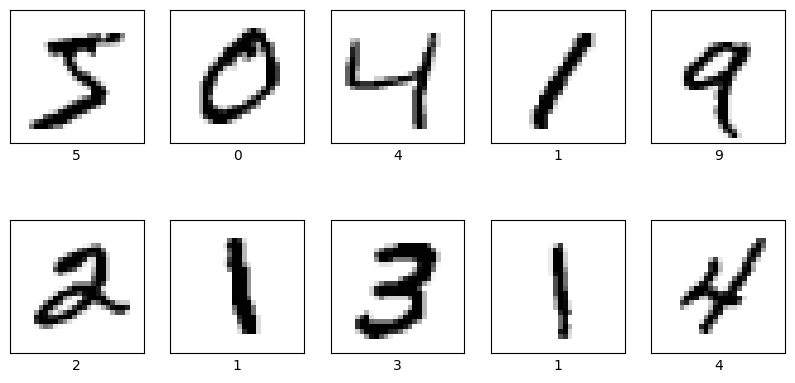

In [43]:
# load the MNIST dataset

# (train_images, train_images_labels), (test_images, test_images_labels) = mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# display some images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i],
                # cmap='gray' # cmap = color map
                cmap=plt.cm.binary # cmap = color map
                )
    plt.xticks([])
    plt.xlabel(Y_train[i])  
    plt.yticks([])
plt.show()

In [44]:
# print the shape of the dataset
print(X_train.shape)
print(Y_train.shape)  
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### We have 60,000 images in the training set and 10,000 images in the test set. Each image is a 28 x 28 pixel matrix which mean images are grayscale as `RGB` images have `3 channels` like if these images are in RGB there 

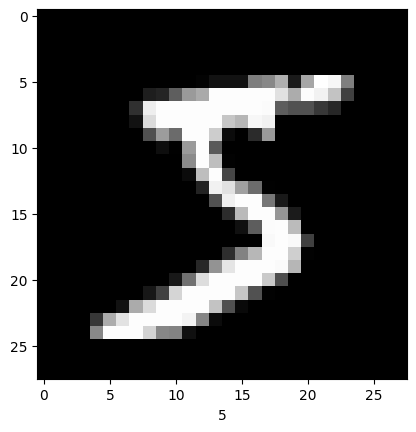

In [45]:
# now print the first image
plt.imshow(X_train[0], cmap='gray')
plt.xlabel(Y_train[0])
plt.show()

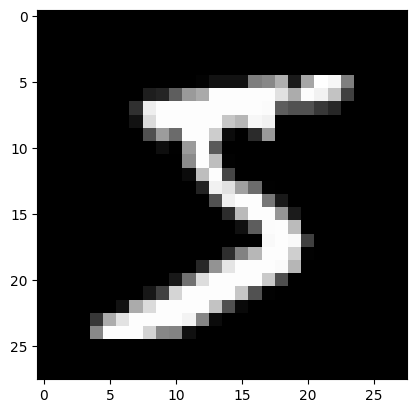

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [46]:
plt.imshow(X_train[0], cmap='gray')
plt.show()


# display the values of each pixel in the image
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=' ')
    print()

(60000, 28, 28)
(10000, 28, 28)


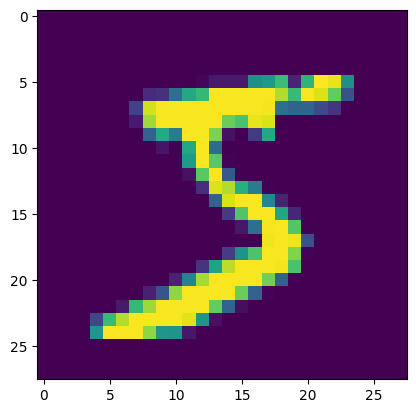

In [47]:
# normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)

plt.imshow(X_train[0])

### CNN Layer Flow:
Input Layer – Defines the input image size (28x28x1 for grayscale).

Conv2D Layer – Extracts features like edges or textures using filters.

MaxPooling2D Layer – Reduces image size while keeping important features.

More Conv2D + Pooling – Learns deeper and more complex features.

Flatten Layer – Converts feature maps into a 1D vector.

Dense Layer – Learns decision rules based on extracted features.

Output Layer (Softmax) – Gives probability for each class (e.g. 0–9 digits).

#### Number of Classes

In [48]:
display(np.unique(Y_train))
display(len(np.unique(Y_train)))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

10

In [49]:
number_classes = len(np.unique(Y_train))

In [50]:
model = tf.keras.models.Sequential([
    # input layer
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # Convolutional layers
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    # MaxPooling layer
    tf.keras.layers.MaxPooling2D(),

    # repeat the Convolutional and MaxPooling layers
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # Output layer
    tf.keras.layers.Dense(number_classes, activation='softmax')
])

In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
%%time
# train the model
history = model.fit(X_train, Y_train, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8016 - loss: 0.6160 - val_accuracy: 0.9596 - val_loss: 0.1277
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9658 - loss: 0.1097 - val_accuracy: 0.9762 - val_loss: 0.0824
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9739 - loss: 0.0846 - val_accuracy: 0.9718 - val_loss: 0.0933
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9797 - loss: 0.0678 - val_accuracy: 0.9825 - val_loss: 0.0616
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9831 - loss: 0.0581 - val_accuracy: 0.9825 - val_loss: 0.0561
CPU times: total: 2min 41s
Wall time: 1min 21s


Train accuracy: 0.985883355140686
Test accuracy: 0.9835000038146973


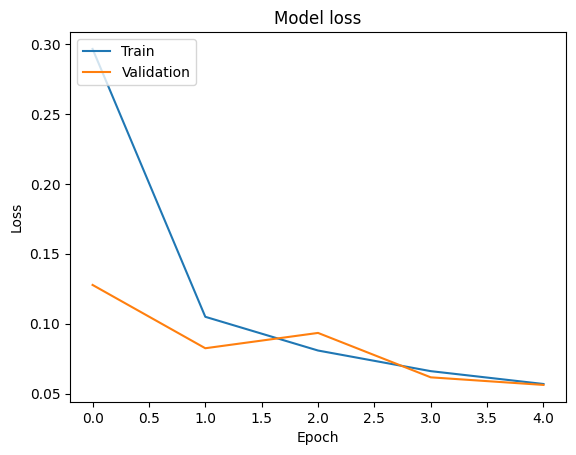

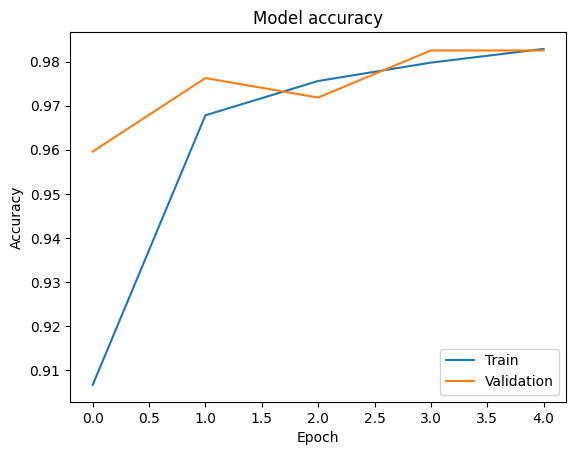

In [54]:
# evaluate the model on the training and test data
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [55]:
# Save the model to be used later
model.save('models_saved/model.keras')

In [84]:
# grab an image
img = X_test[0]
print(img.shape)

# rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)

(28, 28)
(28, 28, 1)


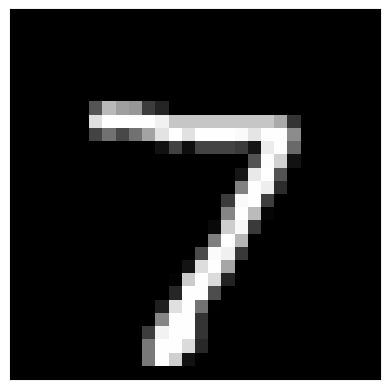

In [ ]:
# print the image
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# predict the class of the image
prediction = model.predict(img.reshape(
    1, # batch size
    28, 28, # image size
    1 # number of channels
))
print(prediction)

# argmax function returns the index of the number which have the highest probability
print(f"The model predicts that this image is a {prediction.argmax()}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[4.3296327e-09 8.5678714e-10 1.1808885e-06 1.1524810e-04 1.5125786e-14
  4.5503344e-11 4.6390403e-17 9.9988258e-01 4.7110897e-09 9.3366094e-07]]
The model predicts that this image is a 7.


In [68]:
img = cv2.imread("images/five.png") 

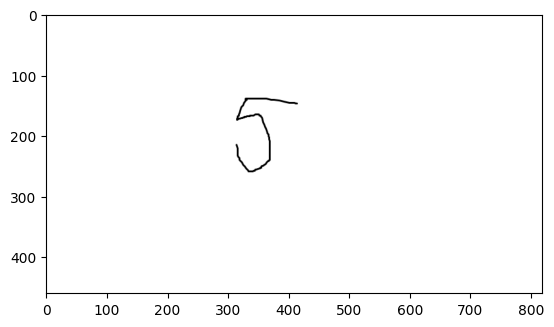

In [69]:
plt.imshow(img)

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(460, 819)

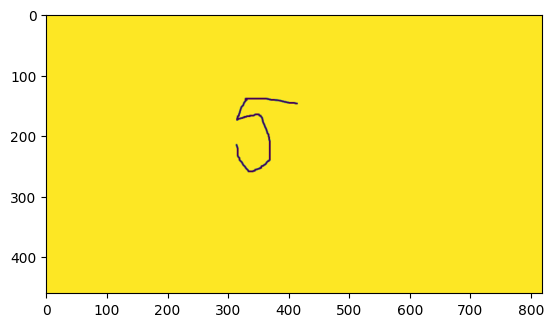

In [ ]:
plt.imshow(gray)

In [ ]:
# Resize to 28x28
resized = cv2.resize(gray, (28, 28))
resized.shape

(28, 28)

In [ ]:
# Normalize the pixel values
resized = resized / 255.0

In [ ]:
# Reshape to match model input shape
reshaped = resized.reshape(1, 28, 28, 1)
reshaped.shape

(1, 28, 28, 1)

In [ ]:
# Predict
prediction = model.predict(reshaped)
print("Probabilities:", prediction)
print("Predicted Class:", prediction.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Probabilities: [[0.02213685 0.08832081 0.00290426 0.00172581 0.7636229  0.00845393
  0.00713822 0.03545228 0.06887241 0.00137262]]
Predicted Class: 4
